In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('fuel_ferc1.csv')

In [4]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].sum().sort_values(ascending=False)

fuel_type_code_pudl
nuclear    4053318.428
oil        1361824.819
coal        576254.381
gas         156891.829
waste         8607.492
other         3048.394
Name: fuel_cost_per_unit_burned, dtype: float64

In [7]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [8]:
df.skew(axis = 0, skipna = True)

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [9]:
df.kurt(axis = 0, skipna = True)

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [12]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

fuel_unit    180
dtype: int64

In [25]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
percent

fuel_unit                       0.609694
fuel_cost_per_mmbtu             0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_unit_burned       0.000000
fuel_mmbtu_per_unit             0.000000
fuel_qty_burned                 0.000000
fuel_type_code_pudl             0.000000
plant_name_ferc1                0.000000
report_year                     0.000000
utility_id_ferc1                0.000000
record_id                       0.000000
dtype: float64

In [16]:
df.groupby('report_year')['fuel_cost_per_unit_burned'].sum().sort_values(ascending=False)

report_year
2014    518002.469
1995    425661.488
2011    374175.603
2010    331581.467
2000    326495.434
2012    321693.544
2008    314312.022
2013    306933.236
2009    263584.566
1994    263292.115
2015    260060.984
2007    256114.312
2016    255484.814
2017    244557.823
2018    221575.426
2006    188142.032
2004    184637.699
2001    180365.641
1997    163533.452
2003    149175.726
1998    140238.656
2005    135924.139
1999    126056.285
2002    121921.135
1996     86425.275
Name: fuel_cost_per_unit_burned, dtype: float64

In [17]:
change = abs(140238.656-263292.115)
total = 140238.656+263292.115
percent = (change/total)*100
percent

30.494194704175364

In [18]:
df.groupby('report_year')['fuel_cost_per_unit_delivered'].sum().sort_values(ascending=False)

report_year
1997    1.218738e+07
1996    1.000602e+07
2000    1.352903e+06
2009    7.975923e+05
2018    4.748057e+05
2015    3.569033e+05
1998    3.178799e+05
2014    2.256952e+05
2013    2.065968e+05
2004    1.663129e+05
2010    1.158381e+05
2016    1.074344e+05
2001    8.142834e+04
1994    7.859053e+04
2012    7.581617e+04
2011    7.412059e+04
2008    7.194631e+04
2003    6.740849e+04
2002    5.735121e+04
2007    5.476283e+04
2005    5.258506e+04
2006    4.805125e+04
2017    4.587348e+04
1995    3.931506e+04
1999    2.682921e+04
Name: fuel_cost_per_unit_delivered, dtype: float64

<Figure size 3600x2160 with 0 Axes>

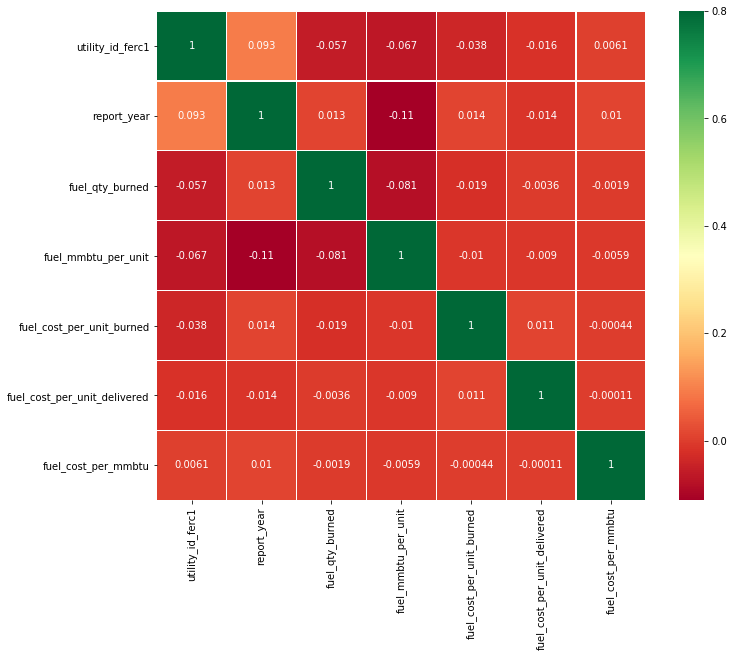

In [22]:
fig = plt.gcf()
corrmat=df.corr()
f, ax = plt.subplots(figsize=(12,9))
fig.set_size_inches(50,30)
sns.heatmap(corrmat, vmax=.8, annot=True, cmap='RdYlGn', linewidth=0.2, square=True)